DATASET DE DATOS DE VENTAS DE PRODUCTOS DE AMAZON


Este conjunto de datos tiene los datos de más de 1.000 calificaciones y reseñas de productos de Amazon según sus detalles enumerados en el sitio web oficial de Amazon.

In [177]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [179]:
#Carga de dataset
data = pd.read_csv('/content/amazon.csv')

In [180]:
#Mostrando dataset
print(data)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

In [181]:
#Mostrando Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [182]:
#Eliminado simbolos y comas
columnas_eliminar = ['actual_price']
simbolo = '₹'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [183]:
columnas_eliminar = ['actual_price']
simbolo = ','

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [184]:
columnas_eliminar = ['discounted_price']
simbolo = '₹'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [185]:
columnas_eliminar = ['discounted_price']
simbolo = ','

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [186]:
columnas_eliminar = ['rating_count']
simbolo = ','

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [187]:
columnas_eliminar = ['discount_percentage']
simbolo = '%'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [188]:
print(data)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...              39

In [189]:
columna_categorica = 'discounted_price'
columna_numerica = 'discounted_pricee'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [190]:
columna_categorica = 'discount_percentage'
columna_numerica = 'discount_percentagee'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [191]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'actual_price'
columna_numerica = 'actual_pricee'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [192]:
print(data)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category rating rating_count  \
0     Computers&Accessories|Accessories&Peripherals|...    4.2      

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1465 non-null   object 
 1   product_name          1465 non-null   object 
 2   category              1465 non-null   object 
 3   rating                1465 non-null   object 
 4   rating_count          1463 non-null   object 
 5   about_product         1465 non-null   object 
 6   user_id               1465 non-null   object 
 7   user_name             1465 non-null   object 
 8   review_id             1465 non-null   object 
 9   review_title          1465 non-null   object 
 10  review_content        1465 non-null   object 
 11  img_link              1465 non-null   object 
 12  product_link          1465 non-null   object 
 13  discounted_pricee     1465 non-null   float64
 14  discount_percentagee  1465 non-null   int64  
 15  actual_pricee        

In [194]:
#eliminar columna Product_id
columna_eliminada = 'product_id'
data.drop(columna_eliminada, axis=1, inplace=True)

In [195]:
#eliminar columna product_name
#columna_eliminada = 'product_name'
#data.drop(columna_eliminada, axis=1, inplace=True)

In [196]:
#eliminar columna about_product
columna_eliminada = 'about_product'
data.drop(columna_eliminada, axis=1, inplace=True)

In [197]:
#eliminar columna user_id
columna_eliminada = 'user_id'
data.drop(columna_eliminada, axis=1, inplace=True)

In [198]:
#eliminar columna user_name
columna_eliminada = 'user_name'
data.drop(columna_eliminada, axis=1, inplace=True)

In [199]:
#eliminar columna review_id
columna_eliminada = 'review_id'
data.drop(columna_eliminada, axis=1, inplace=True)

In [200]:
#eliminar columna review_title
columna_eliminada = 'review_title'
data.drop(columna_eliminada, axis=1, inplace=True)

In [201]:
#eliminar columna review_content
columna_eliminada = 'review_content'
data.drop(columna_eliminada, axis=1, inplace=True)

In [202]:
#eliminar columna img_link
columna_eliminada = 'img_link'
data.drop(columna_eliminada, axis=1, inplace=True)

In [203]:
#eliminar columna product_link
columna_eliminada = 'product_link'
data.drop(columna_eliminada, axis=1, inplace=True)

In [204]:
#Mostrando dataset con columna eliminada
print(data)

                                           product_name  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     Sounce Fast Phone Charging Cable & Data Sync U...   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...                                                 ...   
1460  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category rating rating_count  \
0     Computers&Accessories|Accessories&Peripherals|...    4.2        24269   
1     Computers&Accessories|Accessories&Peripherals|...    4.0        43994   
2     Computers&Accessories|Accessories&Peripherals|..

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          1465 non-null   object 
 1   category              1465 non-null   object 
 2   rating                1465 non-null   object 
 3   rating_count          1463 non-null   object 
 4   discounted_pricee     1465 non-null   float64
 5   discount_percentagee  1465 non-null   int64  
 6   actual_pricee         1465 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 80.2+ KB


In [206]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [207]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [208]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [209]:
#resultado
print(data)

      product_name  category  rating  rating_count  discounted_pricee  \
0             1158        10      19           451              399.0   
1              134        10      17           761              199.0   
2             1023        10      15          1034              199.0   
3             1264        10      19          1118              329.0   
4              829        10      19           272              154.0   
...            ...       ...     ...           ...                ...   
1460           696       192      16            49              379.0   
1461           850       172      18           725             2280.0   
1462           164       138      12           793             2219.0   
1463           462       129      16          1041             1399.0   
1464           195       174      20           976             2863.0   

      discount_percentagee  actual_pricee  
0                       64         1099.0  
1                       43         

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          1465 non-null   int64  
 1   category              1465 non-null   int64  
 2   rating                1465 non-null   int64  
 3   rating_count          1465 non-null   int64  
 4   discounted_pricee     1465 non-null   float64
 5   discount_percentagee  1465 non-null   int64  
 6   actual_pricee         1465 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 80.2 KB


In [211]:
#llenar datos vacios
#columnas_especificas = ['discounted_pricee', 'actual_pricee']
#media_columnas = data[columnas_especificas].mean()
#data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          1465 non-null   int64  
 1   category              1465 non-null   int64  
 2   rating                1465 non-null   int64  
 3   rating_count          1465 non-null   int64  
 4   discounted_pricee     1465 non-null   float64
 5   discount_percentagee  1465 non-null   int64  
 6   actual_pricee         1465 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 80.2 KB


In [213]:
# Lectura de Datos
X = data.iloc[:, :6]
y = data.iloc[:, 6]
m = y.size

In [214]:
print(X)
print('*'*25)
print(y)

      product_name  category  rating  rating_count  discounted_pricee  \
0             1158        10      19           451              399.0   
1              134        10      17           761              199.0   
2             1023        10      15          1034              199.0   
3             1264        10      19          1118              329.0   
4              829        10      19           272              154.0   
...            ...       ...     ...           ...                ...   
1460           696       192      16            49              379.0   
1461           850       172      18           725             2280.0   
1462           164       138      12           793             2219.0   
1463           462       129      16          1041             1399.0   
1464           195       174      20           976             2863.0   

      discount_percentagee  
0                       64  
1                       43  
2                       90  
3      

In [215]:
#normalizar para que esten en un rango.
# esto no modificar, esto usar.
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
#calcular las medias del vector x pero por las filas
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    #obtener la x normalizada
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [216]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      product_name  category  rating  rating_count  discounted_pricee  \
0             1158        10      19           451              399.0   
1              134        10      17           761              199.0   
2             1023        10      15          1034              199.0   
3             1264        10      19          1118              329.0   
4              829        10      19           272              154.0   
...            ...       ...     ...           ...                ...   
1460           696       192      16            49              379.0   
1461           850       172      18           725             2280.0   
1462           164       138      12           793             2219.0   
1463           462       129      16          1041             1399.0   
1464           195       174      20           976             2863.0   

      discount_percentagee  
0                       64  
1                       43  
2                       90  
3      

In [217]:
# Anade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [218]:
print(X)

[[ 1.          1.24913872 -1.40573313 ... -0.35867675 -0.39273074
   0.75402906]
 [ 1.         -1.38193779 -1.40573313 ...  0.57839494 -0.42154116
  -0.21691117]
 [ 1.          0.90226828 -1.40573313 ...  1.40362259 -0.42154116
   1.95614555]
 ...
 [ 1.         -1.30485547  0.70735146 ...  0.67512492 -0.13055596
  -0.91043991]
 [ 1.         -0.53917109  0.5587752  ...  1.42478227 -0.24867867
  -1.00291041]
 [ 1.         -1.22520374  1.3016565  ...  1.2282995  -0.03778643
  -1.18785141]]


In [219]:
def calcularCosto(X, y, theta):
  m = y.shape[0] # numero de ejemplos de entrenamiento
  J = 0
  #la formula de costo, hipotesis, h o 'y' sombrerito.
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [220]:
#pasarle todas las x, las ys, las theta, alpha, y el numero d iteraciones.

def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  #inicializa algunos valores
  m = y.shape[0] # numero de ejemplos de entrenamiento

  #realiza una copia de theta, el cual sera actualizada por el descenso por el gradiente
  theta = theta.copy()

  J_historico = []

  for i in range(numero_iteraciones):
    #segunda ecuacion de la pagina 44 de la diapositivav
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

theta calculado por el descenso por el gradiente: [3442.89249047  339.07960789  531.50261338  538.56769589    9.64632042
 6508.92286421  -47.32425825]
El precio predecido para el producto de amazon es (usando el descenso por el gradiente): 3922.9466


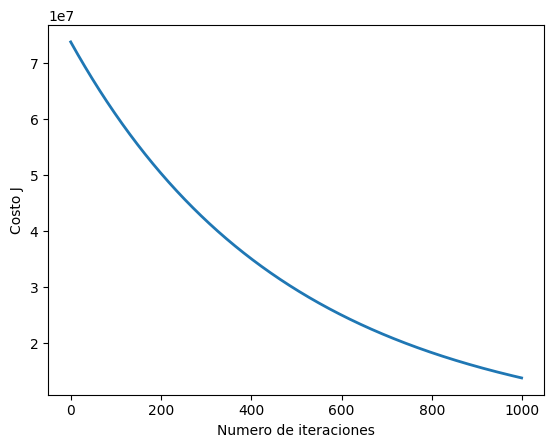

In [221]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_ite = 1000

#Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)


# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio el producto de amazon

X_array = [1, 195, 174, 20, 976, 2863, 22]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta) #se debe cambiar esto

print('El precio predecido para el producto de amazon es (usando el descenso por el gradiente): {:.4f}' .format(price))

In [222]:
X_array = [1, 195, 174, 20, 976, 2863, 22]
X_array[1:7] = (X_array[1:7] - mu) / sigma

In [223]:
X_array[1:7]

[-1.2252037380680174,
 1.3016565004903953,
 0.7084495956778188,
 1.2282994974852672,
 -0.037786426194917004,
 -1.187851410534286]

In [224]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [225]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 195, 174, 20, 976, 2863, 22]
price = np.dot(X_array, theta)

print('Precio predecido para el producto de amazon es (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 5444.99063481  -214.19690141   557.20429772   327.90283627
   -55.78139007 10750.43187092  1570.11578861]
Precio predecido para el producto de amazon es (usando la ecuación de la normal): $30825775
